# Visualize functions used in cross-immunity predictors

Use these visualizations to develop an intuition for how the parameters of each predictor alter the outcomes.

The epitope cross-immunity predictor is defined as follows:

$$
f_{i}^{ep} = f_{0} - \sigma_{ep} \sum_{j:t_{j} < t_{i}}{x_{j}c(D_{ep}(a_{i}, a_{j}))}
$$

where $\sigma_{ep}$ is a parameter learned from data.

The function $c(D_{ep})$ is defined as follows:

$$
c(D_{ep}) = -\exp(-D_{ep} / D_{0})
$$

where $D_{0}$ is a parameter learned from data.
In Luksza and Lassig 2014, $D_{0}$ was set to 14 "which corresponds to 50% decay of cross-immunity over an average of 6-7 years".

In [2]:
# Import libraries.
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [36]:
def cross_immunity_decay(d_ep, d_init):
    return 1 - np.exp((-1 * d_ep) / float(d_init))

In [37]:
# Set initial to match L&L.
d_init = 14

(0, 20)

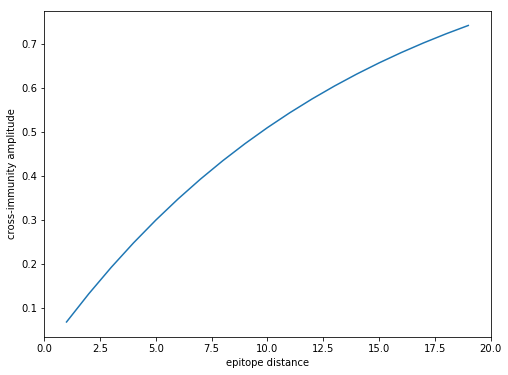

In [38]:
# Plot the c(D_ep) function over a range of plausible values.
d_ep = np.arange(1, 20)

fig, ax = plt.subplots(1, 1, figsize=(8, 6))

immune_decay = cross_immunity_decay(d_ep, d_init)
ax.plot(d_ep, immune_decay)
ax.set_xlabel("epitope distance")
ax.set_ylabel("cross-immunity amplitude")
ax.set_xlim(0, 20)

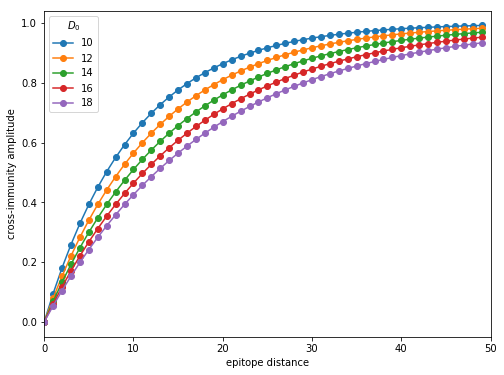

In [40]:
# Plot the c(D_ep) function over a range of plausible values.
max_ep = 50
d_init_range = np.arange(10, 19, 2)
d_ep = np.arange(0, max_ep)

fig, ax = plt.subplots(1, 1, figsize=(8, 6))

for d_init in d_init_range:
    immune_decay = cross_immunity_decay(d_ep, d_init)
    ax.plot(d_ep, immune_decay, "-o", label=d_init)

ax.set_xlabel("epitope distance")
ax.set_ylabel("cross-immunity amplitude")
ax.set_xlim(0, max_ep)
ax.legend(title="$D_0$")